In [1]:
# Clustering/Dimensionality Reduction
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.datasets import load_wine

# DataScience
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('myopia.csv')
df_copy = pd.read_csv('myopia.csv')

In [17]:
df_copy.MYOPIC.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

SyntaxError: invalid syntax (3205310282.py, line 1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
 14  MYOPIC     618 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 72.5 KB


In [4]:
df.drop(columns=['MYOPIC'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


C:\Users\Will\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


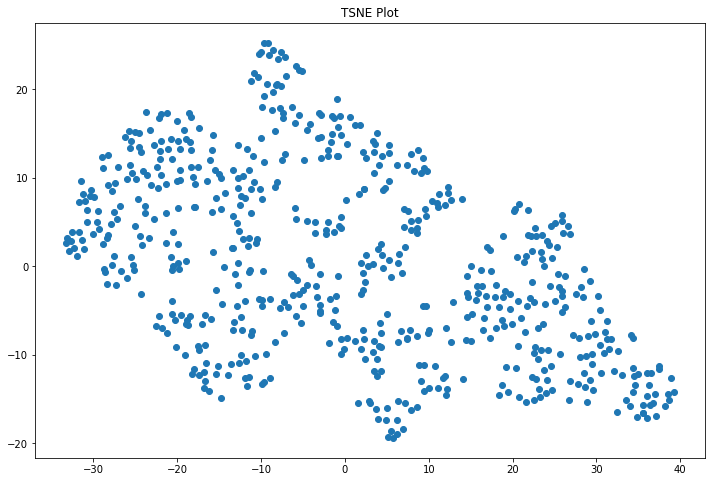

In [6]:
# Check for obvious clusters
X = TSNE(learning_rate="auto").fit_transform(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1])
plt.title("TSNE Plot")
plt.show()

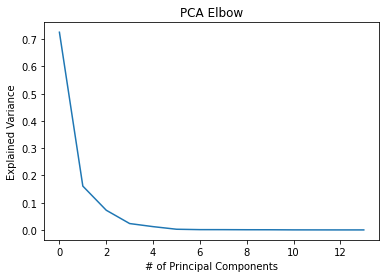

In [7]:
# Initialize PCA model
pca = PCA()
pca.fit(df)

plt.plot(range(len(df.columns)), pca.explained_variance_ratio_)
plt.xlabel("# of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Elbow")
plt.show()

In [8]:
pca = PCA(n_components=3)
pca.fit(df)

components = pd.DataFrame(pca.transform(df), columns=["PCA1", "PCA2", "PCA3"])

components.head()

,PCA1,PCA2,PCA3
0,12.138059,31.636212,-4.526625
1,-15.268363,-6.095695,1.207074
2,-11.662239,3.755105,2.808212
3,11.235886,4.012566,-8.179565
4,-22.446506,4.580916,-1.817501


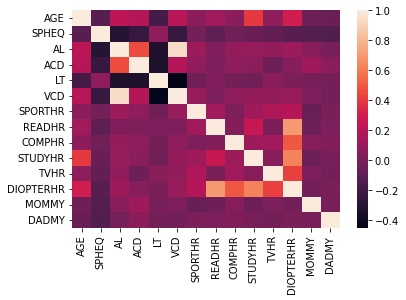

In [9]:
corrs = df.corr()
sns.heatmap(corrs)
plt.show()

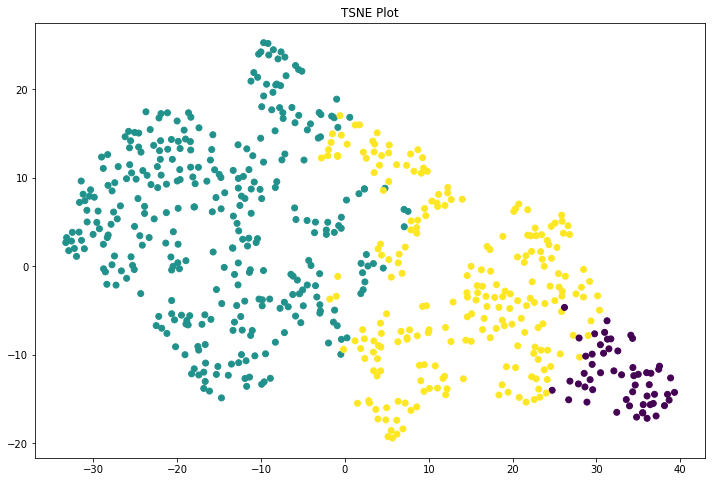

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)

plt.title("TSNE Plot")
plt.show()

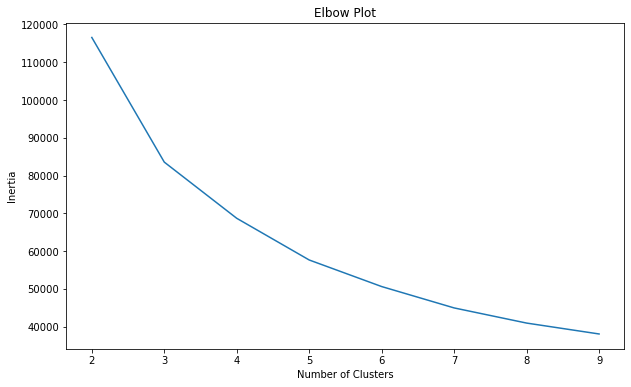

In [11]:
inertia = []
k_range = list(range(2, 10))

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(components)
    
    inertia.append(kmeans.inertia_)
    
# make plot
plt.figure(figsize=(10,6))

plt.plot(k_range, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Plot")

plt.show()

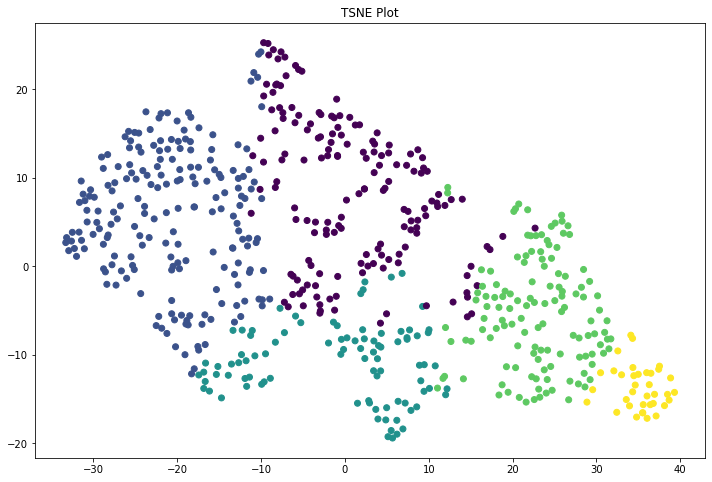

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)

plt.title("TSNE Plot")
plt.show()

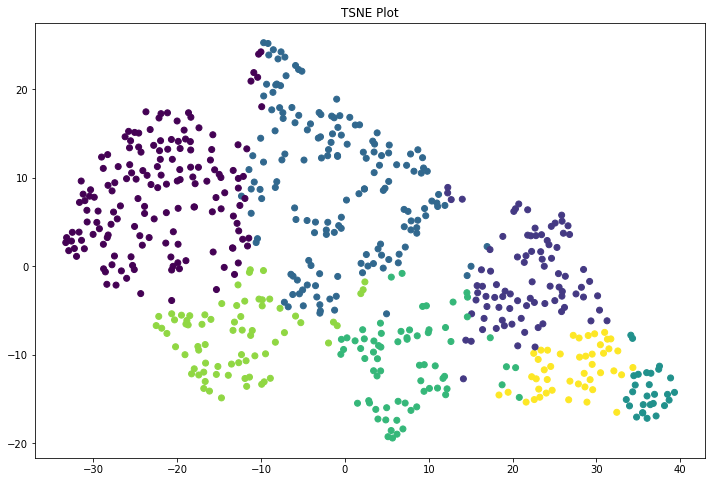

In [13]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)

plt.title("TSNE Plot")
plt.show()

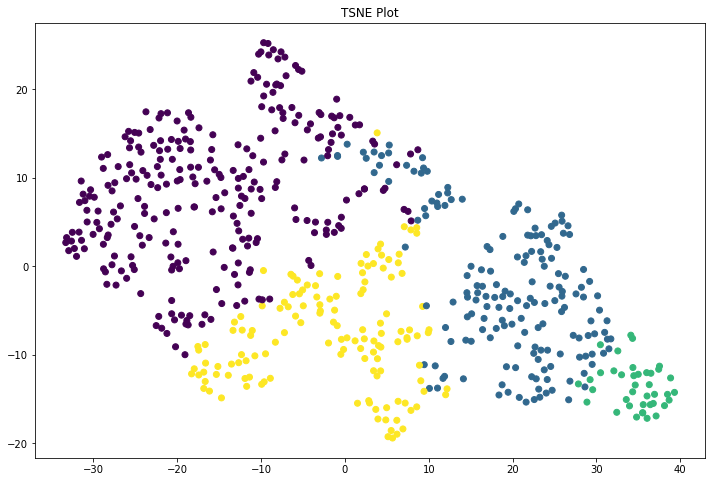

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df)
preds = kmeans.predict(df)

plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)

plt.title("TSNE Plot")
plt.show()

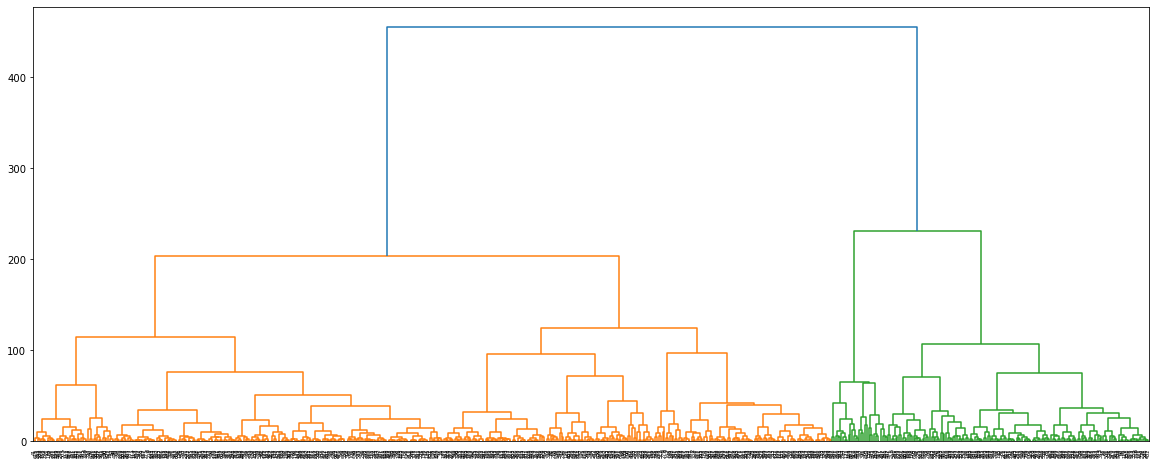

In [15]:
mergings = linkage(components, method="ward")

plt.figure(figsize=(20,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

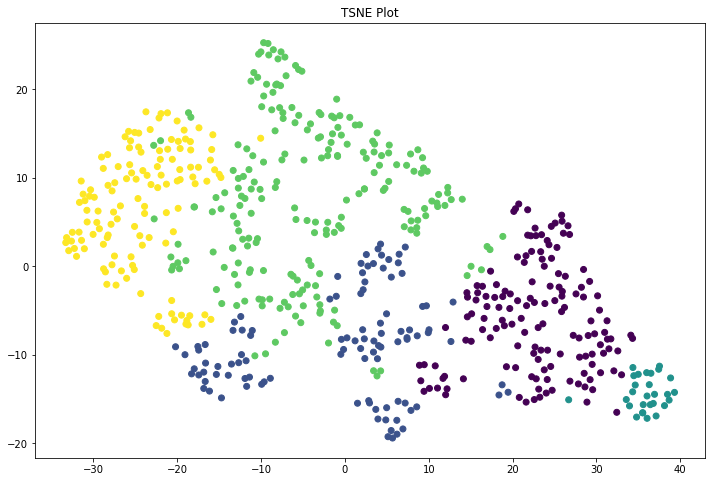

In [16]:
cluster = AgglomerativeClustering(
    n_clusters=5,
    affinity="euclidean",
    linkage="ward"
)

preds = cluster.fit_predict(df)
plt.figure(figsize=(12,8))

plt.scatter(X[:,0], X[:,1], c=preds)
plt.title("TSNE Plot")
plt.show()

Recommendation: Based on the kmean and the dendogram, I think 5 is the optimal number of clusters. Our elbow plot appears to be more of a gentle elbow curve rather than a defined point. The TSNE plots of 4-8 clusters all looked decent but beyond 5 there seems to be too much noise. Without any domain knowledge it is difficult to know exactly how many groups there realistically should be, but based on just the numbers I think 5 is a safe bet. 